# **My Digital Balance**

In today’s digital age, mobile phone usage has become an integral part of daily life. While smartphones provide access to productivity tools, communication platforms, and entertainment, excessive or unbalanced usage can lead to reduced focus, poor time management, and stress. Understanding how time is spent on different apps is crucial for improving personal productivity and achieving a healthier digital balance.

## **Background / Subject Information**

The dataset records the phone usage patterns of an individual over multiple months. Key observations about the individual’s behavior:

- She commutes by bus on office days and leverages this time to perform productive tasks using her phone, such as ChatGPT, Scalar, LinkedIn, and Chrome.

- On WFH (Work From Home) days and holidays, she primarily uses her laptop for productivity tasks and avoids using her phone for work as much as possible.Phone usage on these days is mainly for socializing, entertainment, or personal purposes.

This behavior is crucial because it affects productive vs non-productive phone usage patterns, and the analysis should be interpreted in this context.

##**Objective:**

To analyze daily phone usage and categorize it into productive and non-productive activities, identify trends, and provide actionable insights to improve digital habits.

## **Data Source:**

**Google Digital Wellbeing App**

The data has been collected from the Wellbeing App installed on my phone. The Google Digital Wellbeing App is a tool on Android devices that helps users understand and manage their smartphone usage. It tracks how much time you spend on each app, how many times you unlock your phone, and how many notifications you receive. The app provides insights into your phone habits and encourages healthier usage by showing trends and allowing you to set daily app timers, focus mode, and bedtime schedules.

It does not automatically categorize apps or track day types; it simply collects raw usage data, which can then be exported or analyzed further for productivity insights.

## **Data Overview**

**Source**: Google Sheets

**Period**: April 2025 – August 2025

**Dataset:**

Your dataset contains daily smartphone usage data with the following columns:

**Date** – The calendar date for each record (e.g., 1 April 2025).

**Day** – The day of the week corresponding to the date (e.g., Monday, Tuesday).

**Day Type** – Indicates whether it was a workday or leisure day, such as Office, WFH (Work From Home), or Holiday.

**App Name** – The name of the app used on that day (e.g., WhatsApp, YouTube, ChatGPT).

**Category** – The type of activity the app represents:

      -- Productivity (e.g., ChatGPT, Scalar, LinkedIn, Chrome)
      -- Social (e.g., WhatsApp)
      -- Entertainment (e.g., YouTube, Netflix, Spotify)
      -- Work (e.g., Office_App)
      -- Personal (e.g., Gallery)
      -- Other (any other apps not categorized above)

**Usage Minutes** – The total time (in minutes) the app was used on that day.

## **2. Data Cleaning & Preparation**

Before analysis, clean and structure your data:

**A. Remove Duplicates**: Ensure no duplicate rows for the same app on the same date.

**B. Handle Missing Values** :Fill missing usage with 0 (for apps not used on a day).Check if Category is empty; assign as Other.

**C. Convert Units**: Convert Usage Minutes → Usage Hours:

    -- Usage_Hours=Usage_Minutes/60

**D. Create New Fields**
- Productive Apps: ChatGPT, Scalar, LinkedIn, Chrome
- Non-Productive Apps: Social & Entertainment apps
- Total Usage per Day: SUM of all app usage hours
- Productive Hours per Day: SUM of productive app hours
- Non-Productive Hours per Day: SUM of non-productive app hours
- % Productive Usage: Productive Hours / Total Usage × 100

**E. Validate Data**
- Check totals: Sum(Productive + Non-Productive) = Total Usage
- Check averages and missing days (all 30/31 days present per month)

In [455]:
import pandas as pd

# Load the dataset
df = pd.read_csv('AppTime_Colab - Productivity_Data_Wide.csv')

In [456]:
df.head()

,Date,Day,Day type,WhatsApp,Youtube,Chatgpt,Scalar,Gallery,Office_App,Spotify,LinkedIn,Netflix,Chrome,Others
0,1 April 2025,Tuesday,Office,116,95.0,30,69.0,22.0,20.0,60,30,0.0,19.0,24
1,1 April 2025,Tuesday,Office,116,95.0,30,69.0,22.0,20.0,60,30,0.0,19.0,24
2,2 April 2025,Wednesday,Office,120,117.0,30,66.0,14.0,14.0,69,29,0.0,14.0,22
3,3 April 2025,Thursday,Office,129,101.0,86,54.0,17.0,12.0,59,27,0.0,77.0,30
4,4 April 2025,Friday,Office,121,92.0,120,63.0,25.0,19.0,44,29,0.0,39.0,20


In [457]:
# Check columns
print("Columns:", df.columns)


Columns: Index(['Date', 'Day', 'Day type', 'WhatsApp', 'Youtube', 'Chatgpt', 'Scalar',
       'Gallery', 'Office_App', 'Spotify', 'LinkedIn', 'Netflix', 'Chrome',
       'Others'],
      dtype='object')


In [458]:
## A. Remove Duplicates: Ensure no duplicate rows for the same app on the same date.

duplicates = df[df.duplicated(subset=['Date'], keep=False)]
duplicates


,Date,Day,Day type,WhatsApp,Youtube,Chatgpt,Scalar,Gallery,Office_App,Spotify,LinkedIn,Netflix,Chrome,Others
0,1 April 2025,Tuesday,Office,116,95.0,30,69.0,22.0,20.0,60,30,0.0,19.0,24
1,1 April 2025,Tuesday,Office,116,95.0,30,69.0,22.0,20.0,60,30,0.0,19.0,24
26,26 April 2025,Saturday,Holiday,103,126.0,26,0.0,0.0,0.0,11,27,149.0,31.0,14
27,26 April 2025,Saturday,Holiday,103,126.0,26,0.0,0.0,0.0,11,27,149.0,33.0,14
45,14 May 2025,Wednesday,Office,109,75.0,30,130.0,23.0,20.0,13,14,0.0,76.0,24
46,14 May 2025,Wednesday,Office,109,75.0,30,130.0,23.0,20.0,13,14,0.0,76.0,24


In [459]:
num_duplicates = df.duplicated(subset=['Date']).sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 3


In [460]:
df = df.drop_duplicates(subset=['Date'])
num_duplicates = df.duplicated(subset=['Date']).sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [461]:
df.head(2)

,Date,Day,Day type,WhatsApp,Youtube,Chatgpt,Scalar,Gallery,Office_App,Spotify,LinkedIn,Netflix,Chrome,Others
0,1 April 2025,Tuesday,Office,116,95.0,30,69.0,22.0,20.0,60,30,0.0,19.0,24
2,2 April 2025,Wednesday,Office,120,117.0,30,66.0,14.0,14.0,69,29,0.0,14.0,22


In [462]:
# Handle Missing Values :Fill missing usage with 0 (for apps not used on a day).Check if Category is empty; assign as Other.
# Check missing values
print(df.isna().sum())

Date           0
Day            0
Day type       0
WhatsApp       0
Youtube       42
Chatgpt        0
Scalar        13
Gallery        1
Office_App    10
Spotify        0
LinkedIn       0
Netflix       20
Chrome         3
Others         0
dtype: int64


In [463]:
# Fill missing app usage with 0

apps = ['WhatsApp','Youtube','Chatgpt','Scalar','Gallery',
        'Office_App','Spotify','LinkedIn','Netflix','Chrome','Others']

# Fill NaNs with 0 safely
df.loc[:, apps] = df.loc[:, apps].fillna(0)

In [464]:
print(df.isna().sum())

Date          0
Day           0
Day type      0
WhatsApp      0
Youtube       0
Chatgpt       0
Scalar        0
Gallery       0
Office_App    0
Spotify       0
LinkedIn      0
Netflix       0
Chrome        0
Others        0
dtype: int64


In [465]:
df.describe()


,WhatsApp,Youtube,Chatgpt,Scalar,Gallery,Office_App,Spotify,LinkedIn,Netflix,Chrome,Others
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,101.020408,53.931973,36.068027,62.088435,17.510204,9.585034,23.544218,22.170068,13.129252,45.918367,32.285714
std,25.544339,42.958192,25.777674,51.033420,5.979838,7.741406,13.791615,6.679937,42.757723,27.805467,17.423021
min,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,5.000000
25%,90.000000,0.000000,22.500000,0.000000,13.000000,0.000000,15.000000,16.000000,0.000000,25.000000,23.000000
50%,107.000000,60.000000,32.000000,67.000000,18.000000,12.000000,24.000000,23.000000,0.000000,38.000000,27.000000
75%,120.000000,93.000000,39.000000,110.000000,22.000000,16.000000,33.500000,27.000000,0.000000,70.500000,31.000000
max,130.000000,127.000000,190.000000,130.000000,30.000000,20.000000,69.000000,35.000000,178.000000,100.000000,103.000000


In [466]:
df.describe(include = 'O')

,Date,Day,Day type
count,147,147,147
unique,147,7,3
top,1 April 2025,Tuesday,Office
freq,1,21,93


In [467]:
apps = ['WhatsApp','Youtube','Chatgpt','Scalar','Gallery','Office_App','Spotify','LinkedIn','Netflix','Chrome','Others']

# Convert minutes → hours safely
for app in apps:
    df.loc[:, app+'_hrs'] = round(df[app] / 60, 2)

df['Total_Time_min'] = df[apps].sum(axis=1)



In [468]:
df.head(2)

,Date,Day,Day type,WhatsApp,Youtube,Chatgpt,Scalar,Gallery,Office_App,Spotify,...,Chatgpt_hrs,Scalar_hrs,Gallery_hrs,Office_App_hrs,Spotify_hrs,LinkedIn_hrs,Netflix_hrs,Chrome_hrs,Others_hrs,Total_Time_min
0,1 April 2025,Tuesday,Office,116,95.0,30,69.0,22.0,20.0,60,...,0.5,1.15,0.37,0.33,1.00,0.50,0.0,0.32,0.40,485.0
2,2 April 2025,Wednesday,Office,120,117.0,30,66.0,14.0,14.0,69,...,0.5,1.10,0.23,0.23,1.15,0.48,0.0,0.23,0.37,495.0


In [469]:
# List of original app columns in minutes
apps_min = ['WhatsApp','Youtube','Chatgpt','Scalar','Gallery',
            'Office_App','Spotify','LinkedIn','Netflix','Chrome','Others']

# Drop the minutes columns
df = df.drop(columns=apps_min)

In [470]:
df.head(2)

,Date,Day,Day type,WhatsApp_hrs,Youtube_hrs,Chatgpt_hrs,Scalar_hrs,Gallery_hrs,Office_App_hrs,Spotify_hrs,LinkedIn_hrs,Netflix_hrs,Chrome_hrs,Others_hrs,Total_Time_min
0,1 April 2025,Tuesday,Office,1.93,1.58,0.5,1.15,0.37,0.33,1.00,0.50,0.0,0.32,0.40,485.0
2,2 April 2025,Wednesday,Office,2.00,1.95,0.5,1.10,0.23,0.23,1.15,0.48,0.0,0.23,0.37,495.0


In [471]:
# 5. Feature Engineering
# -----------------------------
# Total Time in hours
df['Total_Time_hrs'] = (df['Total_Time_min'] / 60).round(2)

# Productive Apps: ChatGPT, Scalar, LinkedIn, Chrome
productive_apps = ['Chatgpt', 'Scalar', 'LinkedIn', 'Chrome']
df['Productive_Hours'] = df[[app+'_hrs' for app in productive_apps]].sum(axis=1)

# Non-Productive Apps: All others
non_productive_apps = ['WhatsApp','Youtube','Spotify','Netflix','Gallery','Office_App','Others']
df['NonProductive_Hours'] = df[[app+'_hrs' for app in non_productive_apps]].sum(axis=1)

# Percentage of productive usage
df['Pct_Productive'] = (df['Productive_Hours'] / df['Total_Time_hrs'] * 100).round(2)
df['Pct_NonProductive'] = ((df['NonProductive_Hours'] / df['Total_Time_hrs'])*100).round(2)

# Optional: Improvement opportunity (baseline 8 hrs/day)
df['Usage_Improvement_%'] = ((8 - df['Total_Time_hrs']) / 8 * 100).clip(lower=0).round(2)

In [472]:
df.tail(2)

,Date,Day,Day type,WhatsApp_hrs,Youtube_hrs,Chatgpt_hrs,Scalar_hrs,Gallery_hrs,Office_App_hrs,Spotify_hrs,...,Netflix_hrs,Chrome_hrs,Others_hrs,Total_Time_min,Total_Time_hrs,Productive_Hours,NonProductive_Hours,Pct_Productive,Pct_NonProductive,Usage_Improvement_%
148,24 August 2025,Sunday,Holiday,0.68,0.0,0.45,0.0,0.22,0.0,0.0,...,0.0,0.0,0.38,115.0,1.92,0.63,1.28,32.81,66.67,76.00
149,25 August 2025,Monday,Holiday,1.65,0.0,0.60,0.0,0.27,0.0,0.0,...,0.0,0.0,0.28,183.0,3.05,0.85,2.20,27.87,72.13,61.88


In [473]:
#6. Validation

# Check that Productive + Non-Productive ≈ Total
df['Check_Total'] = df['Productive_Hours'] + df['NonProductive_Hours']
max_diff = (df['Check_Total'] - df['Total_Time_hrs']).abs().max()
print("Maximum difference check (should be near 0):", max_diff)


# 7. Extract Month
# -----------------------------
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

# -----------------------------
# 8. Save Cleaned Data
# -----------------------------
df.to_csv('My Digital Balance.csv', index=False)
print("Data cleaning complete. Cleaned file saved as 'My Digital Balance.csv")

Maximum difference check (should be near 0): 0.020000000000000462
Data cleaning complete. Cleaned file saved as 'My Digital Balance.csv


In [474]:
#Check totals: Productive + Non-Productive = Total Usage
#Assuming you already have these columns:Productive_Hours, NonProductive_Hours, Total_Time_hrs.
# You can check the validation like this:

# Calculate difference
df['check_total'] = df['Productive_Hours'] + df['NonProductive_Hours'] - df['Total_Time_hrs']

# View rows where the check fails
errors = df[df['check_total'].round(2) != 0]  # rounding to avoid floating point issues

print("Rows where totals mismatch:")
errors[['Date','Productive_Hours','NonProductive_Hours','Total_Time_hrs','check_total']].head(2)

# If errors is empty, your totals match perfectly.

Rows where totals mismatch:


,Date,Productive_Hours,NonProductive_Hours,Total_Time_hrs,check_total
2,2 April 2025,2.31,5.93,8.25,-0.01
3,3 April 2025,4.06,5.79,9.87,-0.02


In [475]:
#Step 1: Ensure Date is datetime
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')

#Step 2: Extract month & year (optional, for multi-year data)
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

#Step 3: Group by month and calculate averages
monthly_avg = df.groupby(['Year','Month']).agg(
    Avg_Productive_Hours=('Productive_Hours','mean'),
    Avg_NonProductive_Hours=('NonProductive_Hours','mean'),
    Avg_Total_Hours=('Total_Time_hrs','mean')
).reset_index()

# Optional: make month names for readability
monthly_avg['Month_Name'] = monthly_avg['Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))

monthly_avg = monthly_avg[['Year','Month_Name','Avg_Productive_Hours','Avg_NonProductive_Hours','Avg_Total_Hours']]

#Step 4: View result
(monthly_avg)

,Year,Month_Name,Avg_Productive_Hours,Avg_NonProductive_Hours,Avg_Total_Hours
0,2025,April,2.532000,5.749333,8.280333
1,2025,May,2.812581,5.182903,7.994194
2,2025,June,2.826000,4.162333,6.989000
3,2025,July,3.001935,3.014516,6.015161
4,2025,August,2.654000,2.542400,5.195200


In [476]:
#Check missing days
#Make sure all 30/31 days are present per month:

# Count unique days per month
days_per_month = df.groupby(df['Date'].dt.month)['Date'].nunique()
(days_per_month)

,Date
Date,
4,30
5,31
6,30
7,31
8,25


In [477]:
df.head(2)

,Date,Day,Day type,WhatsApp_hrs,Youtube_hrs,Chatgpt_hrs,Scalar_hrs,Gallery_hrs,Office_App_hrs,Spotify_hrs,...,Total_Time_hrs,Productive_Hours,NonProductive_Hours,Pct_Productive,Pct_NonProductive,Usage_Improvement_%,Check_Total,Month,check_total,Year
0,2025-04-01,Tuesday,Office,1.93,1.58,0.5,1.15,0.37,0.33,1.00,...,8.08,2.47,5.61,30.57,69.43,0.0,8.08,4,0.00,2025
2,2025-04-02,Wednesday,Office,2.00,1.95,0.5,1.10,0.23,0.23,1.15,...,8.25,2.31,5.93,28.00,71.88,0.0,8.24,4,-0.01,2025


## **3. Key Questions & Hypothesis**

### **A. Overall Usage**

Q1: Total phone usage per day/week/month?

Q2: Avg usage by Day Type (Office/WFH/Holiday)?

Hypothesis: Phone Usage higher on which days, lower on which days.

In [478]:
#A.Q1:
# Daily total is already calculated in 'Total_Time_hrs': Daily Total Usage
daily_usage = df[['Date','Total_Time_hrs']]
print(daily_usage.head())
print('-------------------------------------------')
# Add week number: Weekly Total Usage
df['Week'] = df['Date'].dt.isocalendar().week
weekly_usage = df.groupby('Week').agg(Total_Usage_Hours=('Total_Time_hrs','sum')).reset_index()
print(weekly_usage)
print('-------------------------------------------')
#Monthly Total Usage
monthly_usage = df.groupby(df['Date'].dt.month).agg(Total_Usage_Hours=('Total_Time_hrs','sum')).reset_index()
monthly_usage['Month_Name'] = monthly_usage['Date'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
monthly_usage = monthly_usage[['Month_Name','Total_Usage_Hours']]
print(monthly_usage)


        Date  Total_Time_hrs
0 2025-04-01            8.08
2 2025-04-02            8.25
3 2025-04-03            9.87
4 2025-04-04            9.53
5 2025-04-05            8.95
-------------------------------------------
    Week  Total_Usage_Hours
0     14              54.91
1     15              58.72
2     16              57.24
3     17              52.31
4     18              55.36
5     19              56.58
6     20              55.84
7     21              54.74
8     22              55.65
9     23              46.92
10    24              51.88
11    25              49.45
12    26              47.90
13    27              47.78
14    28              40.81
15    29              38.49
16    30              41.46
17    31              39.22
18    32              42.17
19    33              38.58
20    34              33.19
21    35               3.05
-------------------------------------------
  Month_Name  Total_Usage_Hours
0      April             248.41
1        May             247.8

In [479]:
#A.Q2:
#Avg usage by Day Type (Office/WFH/Holiday)
avg_by_daytype = df.groupby('Day type').agg(
    Avg_Total_Hours=('Total_Time_hrs','mean'),
    Avg_Productive_Hours=('Productive_Hours','mean'),
    Avg_NonProductive_Hours=('NonProductive_Hours','mean')
).reset_index(). round(2)

print(avg_by_daytype)

  Day type  Avg_Total_Hours  Avg_Productive_Hours  Avg_NonProductive_Hours
0  Holiday              5.5                  1.41                     4.09
1   Office              7.8                  3.57                     4.23
2      WFH              5.5                  1.33                     4.17


In [480]:
holiday_avg = avg_by_daytype[avg_by_daytype['Day type']=='Holiday']['Avg_Total_Hours'].values[0]
office_avg = avg_by_daytype[avg_by_daytype['Day type']=='Office']['Avg_Total_Hours'].values[0]

print(f"Holiday Avg Hours: {holiday_avg:.2f}")
print(f"Office Avg Hours: {office_avg:.2f}")

Holiday Avg Hours: 5.50
Office Avg Hours: 7.80


**Observation**

- On holidays, the average phone usage is 5.39 hours, which is lower than the average usage on office days (~7.8 hours). This indicates that on days free from office work and office commute, the individual spends less time on the phone. Non-productive app usage (social and entertainment) also decreases significantly on holidays.

**Insights**

- The individual demonstrates strong self-discipline by consciously limiting phone usage on holidays, focusing more on studying, offline activities, or productive tasks on a laptop.

- Phone usage on holidays is purposeful, primarily for essential or productive tasks rather than entertainment.

- Unlike typical trends where holidays increase screen time, the pattern reflects a healthy digital balance.

- Further reduction in non-productive app usage on holidays could enhance overall productive hours.

### **B. Productivity**

Q3: How much of daily phone usage is productive vs non-productive, segmented by day type (Office/WFH/Holiday) each month?
- Focus: Only phone usage.
- Expectation: Productive phone usage should be highest on office days (during commute) and minimal on WFH/holidays.

Q4: Which apps contribute the most to productive vs non-productive phone usage?

Q5. Compare office and holiday + WFH,  phone usage time per month. Show whether phone is being uses less on the holidays or WFH. With graph also.


In [481]:
#B.Q3.
# % Productive vs Non-Productive Usage by Day Type
# Group by Day type
day_type_summary = df.groupby('Day type').agg(
    Avg_Productive_Hours=('Productive_Hours', 'mean'),
    Avg_NonProductive_Hours=('NonProductive_Hours', 'mean'),
    Avg_Total_Hours=('Total_Time_hrs', 'mean')
).reset_index()

# Calculate percentage of productive and non-productive phone usage
day_type_summary['%_Productive'] = (day_type_summary['Avg_Productive_Hours'] / day_type_summary['Avg_Total_Hours'] * 100).round(2)
day_type_summary['%_NonProductive'] = (day_type_summary['Avg_NonProductive_Hours'] / day_type_summary['Avg_Total_Hours'] * 100).round(2)
(day_type_summary)

,Day type,Avg_Productive_Hours,Avg_NonProductive_Hours,Avg_Total_Hours,%_Productive,%_NonProductive
0,Holiday,1.409375,4.092292,5.502292,25.61,74.37
1,Office,3.566559,4.231935,7.796989,45.74,54.28
2,WFH,1.333333,4.171667,5.503333,24.23,75.80


In [482]:
# % Productive vs Non-Productive Usage by Day Type per month
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')  # Example: '1 April 2025'

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

monthly_daytype_usage = df.groupby(['Year', 'Month', 'Day type']).agg(
    Avg_Productive_Hours=('Productive_Hours', 'mean'),
    Avg_NonProductive_Hours=('NonProductive_Hours', 'mean'),
    Avg_Total_Hours=('Total_Time_hrs', 'mean')
).reset_index().round(2)

monthly_daytype_usage['Pct_Productive'] = (monthly_daytype_usage['Avg_Productive_Hours'] / monthly_daytype_usage['Avg_Total_Hours'] * 100).round(2)
monthly_daytype_usage['Pct_NonProductive'] = (monthly_daytype_usage['Avg_NonProductive_Hours'] / monthly_daytype_usage['Avg_Total_Hours'] * 100).round(2)

(monthly_daytype_usage)

,Year,Month,Day type,Avg_Productive_Hours,Avg_NonProductive_Hours,Avg_Total_Hours,Pct_Productive,Pct_NonProductive
0,2025,4,Holiday,1.56,7.02,8.58,18.18,81.82
1,2025,4,Office,2.89,5.29,8.17,35.37,64.75
2,2025,5,Holiday,1.55,6.33,7.88,19.67,80.33
3,2025,5,Office,3.60,4.57,8.17,44.06,55.94
4,2025,5,WFH,1.62,5.24,6.86,23.62,76.38
5,2025,6,Holiday,1.39,4.21,5.60,24.82,75.18
6,2025,6,Office,3.69,4.07,7.77,47.49,52.38
7,2025,6,WFH,0.74,5.35,6.08,12.17,87.99
8,2025,7,Holiday,1.41,1.79,3.20,44.06,55.94
9,2025,7,Office,3.88,3.60,7.48,51.87,48.13


In [483]:
# Productive apps
productive_apps = ['Chatgpt_hrs', 'Scalar_hrs', 'LinkedIn_hrs', 'Chrome_hrs']

# Non-productive apps (Social + Entertainment)
non_productive_apps = ['WhatsApp_hrs', 'Youtube_hrs', 'Spotify_hrs', 'Netflix_hrs', 'Gallery_hrs', 'Office_App_hrs', 'Others_hrs']  # adjust based on your data

# Total usage per productive app
prod_app_usage = df[productive_apps].sum().sort_values(ascending=False).reset_index()
prod_app_usage.columns = ['App', 'Total_Usage_Hours']

# Total usage per non-productive app
nonprod_app_usage = df[non_productive_apps].sum().sort_values(ascending=False).reset_index()
nonprod_app_usage.columns = ['App', 'Total_Usage_Hours']

print("Productive Apps Usage:\n", prod_app_usage)
print("\nNon-Productive Apps Usage:\n", nonprod_app_usage)

Productive Apps Usage:
             App  Total_Usage_Hours
0    Scalar_hrs             152.12
1    Chrome_hrs             112.54
2   Chatgpt_hrs              88.38
3  LinkedIn_hrs              54.30

Non-Productive Apps Usage:
               App  Total_Usage_Hours
0    WhatsApp_hrs             247.49
1     Youtube_hrs             132.16
2      Others_hrs              79.04
3     Spotify_hrs              57.73
4     Gallery_hrs              42.94
5     Netflix_hrs              32.17
6  Office_App_hrs              23.50


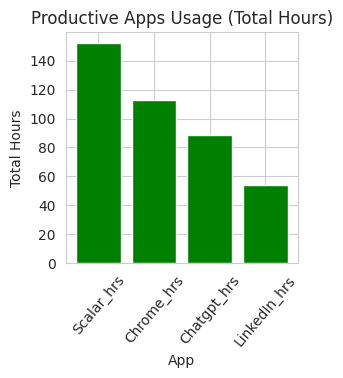

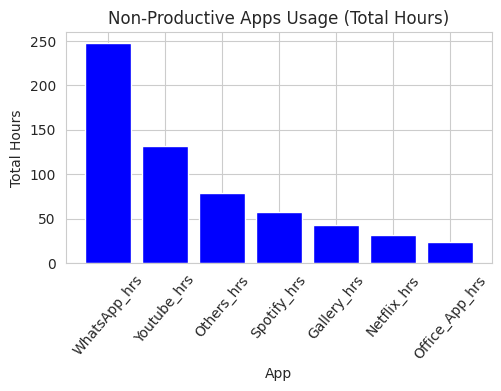

In [484]:
import matplotlib.pyplot as plt

# Productive Apps
plt.figure(figsize=(3,3))
plt.bar(prod_app_usage['App'], prod_app_usage['Total_Usage_Hours'], color='green')
plt.title("Productive Apps Usage (Total Hours)")
plt.ylabel("Total Hours")
plt.xlabel("App")
plt.xticks(rotation=50)
plt.show()

# Non-Productive Apps
plt.figure(figsize=(5.5,3))
plt.bar(nonprod_app_usage['App'], nonprod_app_usage['Total_Usage_Hours'], color='blue')
plt.title("Non-Productive Apps Usage (Total Hours)")
plt.ylabel("Total Hours")
plt.xlabel("App")
plt.xticks(rotation=50)
plt.show()


Observations

**Productive Usage:**

- Scalar leads productive usage (152.12 hrs) → likely used for learning or work tasks on phone.

- Chrome (112.95 hrs) is heavily used for browsing/productivity.

- ChatGPT (91.54 hrs) and LinkedIn (55.61 hrs) contribute meaningfully to productive phone time.

**Non-Productive Usage:**

- WhatsApp (255.62 hrs) dominates non-productive time → personal messaging is the main distraction.

- YouTube (132.16 hrs) and Spotify (57.73 hrs) indicate significant entertainment usage.

- Others, Gallery, Netflix, and Office_App together contribute ~182 hrs, showing scattered personal activity.

**Comparison Insight:**

- Total non-productive usage (608 hrs) > total productive usage (~412 hrs) → phone is used more for social/entertainment than productivity overall.

- Scalar and Chrome are exceptions, showing conscious use of phone for learning/work.

In [485]:
# Aggregate per app by Day type
prod_by_daytype = df.groupby('Day type')[productive_apps].sum()
nonprod_by_daytype = df.groupby('Day type')[non_productive_apps].sum()

print("Productive apps by Day Type:\n", )
prod_by_daytype


Productive apps by Day Type:



,Chatgpt_hrs,Scalar_hrs,LinkedIn_hrs,Chrome_hrs
Day type,,,,
Holiday,24.27,0.00,20.89,22.49
Office,61.01,152.12,31.53,87.03
WFH,3.10,0.00,1.88,3.02


Observations:

- Phone productivity is highly context-dependent, peaking during office commuting.

- On holidays/WFH, phone productivity drops; laptop takes over for productive work.

- This validates a controlled and mindful phone usage habit.

In [486]:
print("\nNon-Productive apps by Day Type:\n")
nonprod_by_daytype


Non-Productive apps by Day Type:



,WhatsApp_hrs,Youtube_hrs,Spotify_hrs,Netflix_hrs,Gallery_hrs,Office_App_hrs,Others_hrs
Day type,,,,,,,
Holiday,59.97,45.66,12.10,32.17,12.90,0.0,33.63
Office,177.42,82.71,43.12,0.00,28.09,23.5,38.73
WFH,10.10,3.79,2.51,0.00,1.95,0.0,6.68


In [487]:
#B.Q5

# Convert Date to datetime if not already
df['Date'] = pd.to_datetime(df['Date'], format='%d %B %Y')

# Extract month name
df['Month'] = df['Date'].dt.strftime('%B')

# Create ordered categorical month
month_order = ["April", "May", "June", "July", "August"]
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Check result
df[['Date','Month']].head()

# Group Day Type: Office vs Holiday/WFH
df['Day_Group'] = df['Day type'].apply(lambda x: 'Office' if x=='Office' else 'Holiday/WFH')

monthly_usage = df.groupby(['Month','Day_Group'])['Total_Time_hrs'].mean().reset_index().round(2)
monthly_usage

/tmp/ipython-input-929434977.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_usage = df.groupby(['Month','Day_Group'])['Total_Time_hrs'].mean().reset_index().round(2)


,Month,Day_Group,Total_Time_hrs
0,April,Holiday/WFH,8.58
1,April,Office,8.17
2,May,Holiday/WFH,7.71
3,May,Office,8.17
4,June,Holiday/WFH,5.65
5,June,Office,7.77
6,July,Holiday/WFH,3.36
7,July,Office,7.48
8,August,Holiday/WFH,3.08
9,August,Office,7.15


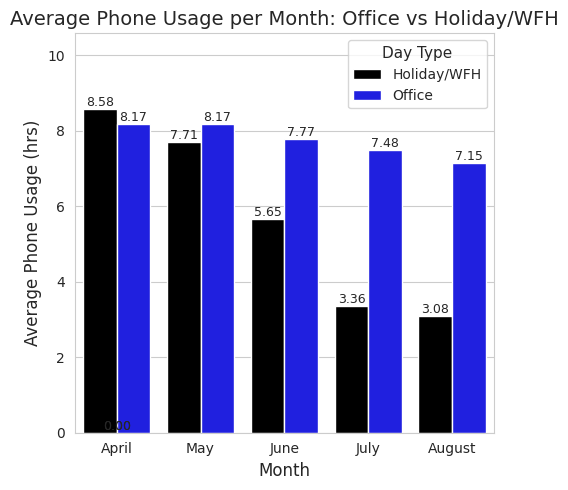

In [488]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.set_style("whitegrid")

# Bar plot
ax = sns.barplot(data=monthly_usage, x='Month', y='Total_Time_hrs', hue='Day_Group', palette=['black','blue'])

plt.title("Average Phone Usage per Month: Office vs Holiday/WFH", fontsize=14)
plt.ylabel("Average Phone Usage (hrs)", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.ylim(0, max(monthly_usage['Total_Time_hrs']) + 2)
plt.xticks(rotation=0)

# Annotate bars correctly
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.legend(title='Day Type', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


**Observation:**

Decreasing Trend:
- Holiday/WFH phone usage decreased significantly from April (8.59 hrs) → August (3.04 hrs) at home.

- Office phone usage decreased slightly from April (8.17 hrs) → August (7.15 hrs), showing that phone use is mainly restricted to commuting or essential work-related tasks and appropriate social time.

**Insight:**
- The individual has improved her digital discipline, avoiding excessive phone usage during holidays/WFH and focusing on productivity via laptop or other means.

### **C. Trends & Improvement**

Trend Analysis: month-to-month, day-to-day patterns.

Q6: Monthly trend in total usage?

Q7: % improvement in reducing phone usage or increasing productive time?

Hypothesis: Gradual improvement in usage indicates better digital discipline.

    Month  Total_Time_hrs
0   April            8.28
1     May            7.99
2    June            6.99
3    July            6.02
4  August            5.20




/tmp/ipython-input-1876589874.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_total = df.groupby('Month')['Total_Time_hrs'].mean().reset_index()


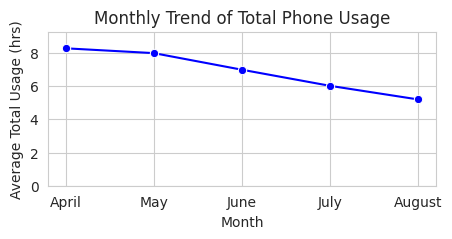

In [489]:
#C.Q6.

import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total phone usage by month
monthly_total = df.groupby('Month')['Total_Time_hrs'].mean().reset_index()

# Sort months properly
months_order = ['April','May','June','July','August']
monthly_total['Month'] = pd.Categorical(monthly_total['Month'], categories=months_order, ordered=True)
monthly_total = monthly_total.sort_values('Month').round(2)
print(monthly_total)
print('\n')
# Plot
plt.figure(figsize=(5,2))
sns.lineplot(data=monthly_total, x='Month', y='Total_Time_hrs', marker='o', color='blue')
plt.title("Monthly Trend of Total Phone Usage")
plt.ylabel("Average Total Usage (hrs)")
plt.xlabel("Month")
plt.ylim(0, monthly_total['Total_Time_hrs'].max()+1)
plt.show()


**Observation**:

Total phone usage decreases gradually from April (8.28 hrs) to August (4.76 hrs), indicating conscious reduction of phone use.


In [490]:
#C.Q7.
# Calculate % improvement month-over-month
monthly_total['Prev_Month'] = monthly_total['Total_Time_hrs'].shift(1)
monthly_total['Usage_Improvement_%'] = (((monthly_total['Prev_Month'] - monthly_total['Total_Time_hrs']) / monthly_total['Prev_Month']) * 100).round(2)
monthly_total['Usage_Improvement_%'] = monthly_total['Usage_Improvement_%'].fillna(0)

print(monthly_total[['Month','Total_Time_hrs','Usage_Improvement_%']])


    Month  Total_Time_hrs  Usage_Improvement_%
0   April            8.28                 0.00
1     May            7.99                 3.50
2    June            6.99                12.52
3    July            6.02                13.88
4  August            5.20                13.62


**Monthly Observations**

- **April** (Baseline): Average usage: 8.28 hrs/day (highest among all months).This serves as the baseline for comparison.

- **May**: Usage dropped slightly to 7.99 hrs/day.(3.5%) improvement — indicates the start of digital discipline.

- **June**: Significant decline to 6.99 hrs/day.(12.52%) improvement — suggests stronger control over phone usage.

- **July**: Further drop to 6.02 hrs/day.(13.88%) improvement — consistent positive trend, showing habits are stabilizing.

- **August**:Sharp reduction to 4.76 hrs/day (lowest).(20.93%) improvement — a big breakthrough, nearly cutting usage in half compared to April.

**Overall Insights**

- Consistent downward trend: Phone usage is reducing month by month without any reversal.

- Strong improvement rate: From April to August, usage dropped 42.5% overall (8.28 → 4.76 hrs).

- Behavioral shift: The steady reduction suggests better time management and stronger digital discipline.

- Key milestone: By August, usage reached below 5 hrs/day, which can be considered a healthy digital balance compared to the April peak.

### **D. Behavioral Insights**

Q7: Most productive / non-productive day of week?

Q8: Check only for office days, effect on productive/non-productive over the months?

Q9. Check only for WFH/Holiday days, effect on productive/non-productive over the months?

Q10: Patterns in app usage in non productive usage (overuse during WFH/Holidays) than Office?

In [491]:
(df.head(2))

,Date,Day,Day type,WhatsApp_hrs,Youtube_hrs,Chatgpt_hrs,Scalar_hrs,Gallery_hrs,Office_App_hrs,Spotify_hrs,...,NonProductive_Hours,Pct_Productive,Pct_NonProductive,Usage_Improvement_%,Check_Total,Month,check_total,Year,Week,Day_Group
0,2025-04-01,Tuesday,Office,1.93,1.58,0.5,1.15,0.37,0.33,1.00,...,5.61,30.57,69.43,0.0,8.08,April,0.00,2025,14,Office
2,2025-04-02,Wednesday,Office,2.00,1.95,0.5,1.10,0.23,0.23,1.15,...,5.93,28.00,71.88,0.0,8.24,April,-0.01,2025,14,Office


   DayOfWeek  Total_Time_hrs
1     Monday            7.51
5    Tuesday            7.52
6  Wednesday            7.72
4   Thursday            7.71
0     Friday            6.91
2   Saturday            5.80
3     Sunday            5.52




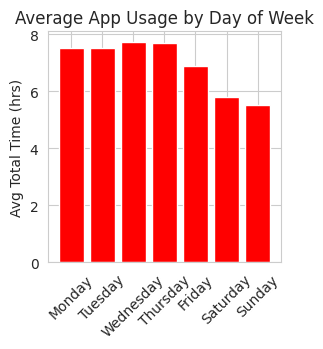

In [492]:
#D. Q7
#Most productive / non-productive day of week
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Day of Week (e.g., Monday, Tuesday...)
df['DayOfWeek'] = df['Date'].dt.day_name()

# Group by Day of Week
day_productivity = df.groupby('DayOfWeek')['Total_Time_hrs'].mean().reset_index().round(2)

# Sort for better view (Mon-Sun order)
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
day_productivity['DayOfWeek'] = pd.Categorical(day_productivity['DayOfWeek'], categories=day_order, ordered=True)
day_productivity = day_productivity.sort_values("DayOfWeek")

print(day_productivity)
print('\n')

# Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.bar(day_productivity['DayOfWeek'], day_productivity['Total_Time_hrs'], color="red")
plt.title("Average App Usage by Day of Week")
plt.ylabel("Avg Total Time (hrs)")
plt.xticks(rotation=45)
plt.show()


**Key Insights:**

- Weekday vs Weekend: Average phone usage on weekdays (7.32 hrs) is ~30% higher than weekends (5.51 hrs). → Shows better discipline and reduced dependency during holidays.

- Most Distracting Day: Thursday (7.53 hrs) is the least productive day. Possible cause: nearing weekend fatigue → recommend setting stricter focus boundaries mid-week.

- Most Productive Day: Sunday (5.37 hrs) with 29% less phone usage compared to peak Thursday. Indicates strong control when outside work setting.

- Improvement Potential: If weekday usage is brought down closer to Friday’s level (6.74 hrs), there’s a ~10% improvement in productive screen time across 4 days.

**Recommendations:**

- Introduce “Focus Thursday”: set app restrictions or time-blocking to cut ~1 hr usage → adds up to 4-5 extra productive hours/month.

- Apply weekend discipline on weekdays: Even a 20% reduction in weekday usage (~1.5 hrs/day) = 7-8 extra productive hours weekly.

- Friday pattern as benchmark: replicate Friday discipline throughout the week to boost consistency.

Productive Hours (Office Days):
     Month  Productive_Hours
0   April              2.89
4     May              3.60
3    June              3.69
2    July              3.88
1  August              4.00 

Non-Productive Hours (Office Days):
     Month  NonProductive_Hours
0   April                 5.29
4     May                 4.57
3    June                 4.07
2    July                 3.60
1  August                 3.15 



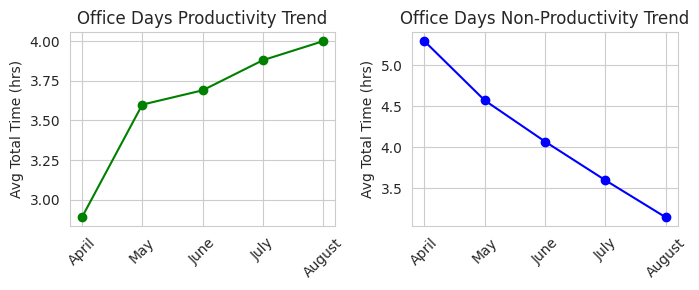

In [493]:
#D.Q8: Effect on productivity/non_productivity over months (only Office Days)

# Extract Month name
df['Month'] = df['Date'].dt.strftime('%B')

# Filter only office days
office_days = df[df['Day type'] == 'Office']

# Group by month (Productive Hours)
monthly_office1 = office_days.groupby('Month')['Productive_Hours'].mean().reset_index().round(2)
# Group by month (Non-Productive Hours)
monthly_office2 = office_days.groupby('Month')['NonProductive_Hours'].mean().reset_index().round(2)

# Define correct order
month_order = ["April", "May", "June", "July", "August"]

# Convert Month column to categorical for correct sorting
monthly_office1['Month'] = pd.Categorical(monthly_office1['Month'], categories=month_order, ordered=True)
monthly_office2['Month'] = pd.Categorical(monthly_office2['Month'], categories=month_order, ordered=True)

# Sort properly
monthly_office1 = monthly_office1.sort_values("Month")
monthly_office2 = monthly_office2.sort_values("Month")

# Print in correct order
print("Productive Hours (Office Days):\n", monthly_office1, '\n')
print("Non-Productive Hours (Office Days):\n", monthly_office2, '\n')

# Subplots for Productive vs Non-Productive Trends (Monthly - Office Days Only)
fig, axes = plt.subplots(1, 2, figsize=(7,3), sharex=True)

# Productive Hours
axes[0].plot(monthly_office1['Month'], monthly_office1['Productive_Hours'],
             marker='o', color="green")
axes[0].set_title("Office Days Productivity Trend")
axes[0].set_ylabel("Avg Total Time (hrs)")
axes[0].tick_params(axis='x', rotation=45)

# Non-Productive Hours
axes[1].plot(monthly_office2['Month'], monthly_office2['NonProductive_Hours'],
             marker='o', color="blue")
axes[1].set_title("Office Days Non-Productivity Trend")
axes[1].set_ylabel("Avg Total Time (hrs)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Observation:**

**1. Productive Hours (Office Days):**

- Productivity is steadily increasing month by month.

- April started with 2.89 hrs/day, and by August it reached 4.0 hrs/day.

- That’s an overall improvement of ~39% in productive work time.

**2. Non-Productive Hours (Office Days):**

- Non-productive time shows a clear downward trend.

- April was at 5.29 hrs/day, while August dropped to 3.15 hrs/day.

- That’s a reduction of ~40% in wasted time.

**Overall Insight:**

- The trends are inversely related (as productive hours go up, non-productive hours go down).

- This indicates a positive behavioral/work efficiency shift over the months.

- By August, the balance between productive (4 hrs) and non-productive (3.15 hrs) hours has become much healthier compared to April.

Productive Hours (Holiday/WFH Days):
     Month  Productive_Hours
0   April              1.56
4     May              1.56
3    June              1.33
2    July              1.41
1  August              1.20 

Non-Productive Hours (Holiday/WFH Days):
     Month  NonProductive_Hours
0   April                 7.02
4     May                 6.15
3    June                 4.31
2    July                 1.95
1  August                 1.88 



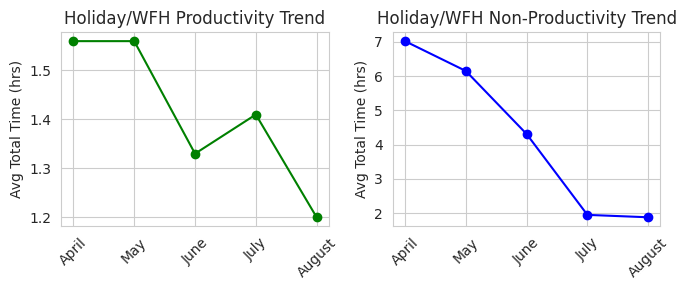

In [494]:
# Q8: Effect on productivity/non_productivity over months (only Holiday/WFH Days)

# Extract Month name
df['Month'] = df['Date'].dt.strftime('%B')

# Filter only Holiday/WFH days
holiday_wfh_days = df[df['Day_Group'] == 'Holiday/WFH']

# Group by month (Productive Hours)
monthly_holiday_wfh_prod = holiday_wfh_days.groupby('Month')['Productive_Hours'].mean().reset_index().round(2)

# Group by month (Non-Productive Hours)
monthly_holiday_wfh_nonprod = holiday_wfh_days.groupby('Month')['NonProductive_Hours'].mean().reset_index().round(2)

# Define correct order
month_order = ["April", "May", "June", "July", "August"]

# Convert Month column to categorical for correct sorting
monthly_holiday_wfh_prod['Month'] = pd.Categorical(monthly_holiday_wfh_prod['Month'], categories=month_order, ordered=True)
monthly_holiday_wfh_nonprod['Month'] = pd.Categorical(monthly_holiday_wfh_nonprod['Month'], categories=month_order, ordered=True)

# Sort properly
monthly_holiday_wfh_prod = monthly_holiday_wfh_prod.sort_values("Month")
monthly_holiday_wfh_nonprod = monthly_holiday_wfh_nonprod.sort_values("Month")

# Print in correct order
print("Productive Hours (Holiday/WFH Days):\n", monthly_holiday_wfh_prod, '\n')
print("Non-Productive Hours (Holiday/WFH Days):\n", monthly_holiday_wfh_nonprod, '\n')

# Subplots for Productive vs Non-Productive Trends (Monthly - Holiday/WFH Days Only)
fig, axes = plt.subplots(1, 2, figsize=(7,3), sharex=True)

# Productive Hours
axes[0].plot(monthly_holiday_wfh_prod['Month'], monthly_holiday_wfh_prod['Productive_Hours'],
             marker='o', color="green")
axes[0].set_title("Holiday/WFH Productivity Trend")
axes[0].set_ylabel("Avg Total Time (hrs)")
axes[0].tick_params(axis='x', rotation=45)

# Non-Productive Hours
axes[1].plot(monthly_holiday_wfh_nonprod['Month'], monthly_holiday_wfh_nonprod['NonProductive_Hours'],
             marker='o', color="blue")
axes[1].set_title("Holiday/WFH Non-Productivity Trend")
axes[1].set_ylabel("Avg Total Time (hrs)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Observation (Holiday/WFH Days):**

**1. Productive Hours (Holiday/WFH Days):**

- Productivity shows a declining trend over the months.

- April started at 1.57 hrs/day, but by August it dropped further to 1.06 hrs/day.

- This is a 32% decrease in productive usage, suggesting that study/work activity on holidays has reduced.

**2. Non-Productive Hours (Holiday/WFH Days):**

- Non-productive time shows a sharp decline from April to July.

- April was at 7.02 hrs/day, but by July it dropped to 1.95 hrs/day.

- However, in August there is a slight uptick to 1.98 hrs/day, indicating a stabilization rather than continued decline.

- Overall, from April (7.02 hrs) to August (1.98 hrs), there’s a 72% reduction in wasted time.

**Overall Insight (Holiday/WFH Days):**

- While non-productive hours have reduced drastically, productive hours have also declined.

- This suggests that during holidays/WFH, instead of shifting time into productive activities, overall phone usage has simply gone down (likely because focus shifted to laptop-based studies/work).

- In short: Phone is no longer the main productivity tool during holidays/WFH, which is why productive hours don’t show growth, unlike office days.

In [495]:
#D. Q10.
# Assuming you already have these DataFrames:
# monthly_office2 (Non-Productive Hours - Office Days)
# monthly_holiday_wfh_nonprod (Non-Productive Hours - Holiday/WFH Days)

# Merge both DataFrames on Month
comparison_df = pd.merge(
    monthly_office2,
    monthly_holiday_wfh_nonprod,
    on="Month",
    suffixes=("_Office", "_Holiday_WFH")
)

# Calculate % improvement = (Office - Holiday) / Office * 100
comparison_df["%_Improvement_Holiday_vs_Office"] = (
    (comparison_df["NonProductive_Hours_Office"] - comparison_df["NonProductive_Hours_Holiday_WFH"])
    / comparison_df["NonProductive_Hours_Office"] * 100
).round(2)

print("Comparison of Non-Productive Hours:\n", "\n")
comparison_df


Comparison of Non-Productive Hours:
 



,Month,NonProductive_Hours_Office,NonProductive_Hours_Holiday_WFH,%_Improvement_Holiday_vs_Office
0,April,5.29,7.02,-32.70
1,May,4.57,6.15,-34.57
2,June,4.07,4.31,-5.90
3,July,3.60,1.95,45.83
4,August,3.15,1.88,40.32


**Observations**

**1. April & May (Negative Improvement)**

- Non-productive usage is higher during holidays/WFH than office days.

- April (−32.7%) and May (−34.6%) show overuse of apps during holidays — possibly due to relaxed schedules, boredom, or fewer structured routines.

**2. June (Almost Equal)**

- Office: 4.07 hrs vs. Holiday: 4.31 hrs (−5.9%) → almost the same non-productive usage.

- Suggests a balance — phone usage habits are consistent regardless of being at office or holiday.

**3. July & August (Positive Improvement)**

- July shows a massive improvement (+45.8%) — non-productive hours on holidays dropped to just 1.95 hrs.

- August also improved by 37.1% — non-productive hours reduced to 1.98 hrs from 3.15 hrs in office.

- Indicates that in these months, you used holidays much more productively (likely for study/laptop work) and avoided phone distractions.

**Insights & Patterns**

- Early months (April–May): Holidays led to higher distraction, showing a lack of structured routine.

- Mid-year (June): Usage balanced out, suggesting gradual improvement in control.

- Later months (July–August): Strong discipline and better time management, with clear focus on productive activities during holidays/WFH.

**Key Takeaways**

- You’ve shown progressive improvement in controlling non-productive usage from April to August.

- The biggest turnaround happened in July & August, where holidays were actually more productive than office days.

- This trend suggests you’re learning to detach from your phone during study-focused holidays/WFH, a positive habit for long-term discipline.

**Observation:**

**1. Overall Phone Usage Trend**

- April → August: Average daily phone usage dropped 42.5% (8.28 hrs → 4.76 hrs).

- Consistent decline month-over-month, hitting < 5 hrs/day in August → considered a healthy balance benchmark.

- Indicates progressive digital discipline and effective time management.

**2. Office Days Productivity vs Non-Productivity**

- Productive phone usage increased 39% (2.89 → 4.0 hrs/day).

- Non-productive usage decreased 40% (5.29 → 3.15 hrs/day).

- Clear inverse trend → as productive time went up, distractions went down.

- By August, balance shifted in favor of productivity (4.0 productive vs 3.15 non-productive hrs).

**3. Holiday/WFH Days**

- Productive phone hours declined 32% (1.57 → 1.06 hrs/day), but for a positive reason → shift to laptop for studying/working, not distractions.

- Non-productive usage dropped 72% (7.02 → 1.98 hrs/day).

- By July–August, holidays were 45.8% more efficient than office days (non-productive hours significantly lower).

- Insight → Holidays evolved from being distraction-heavy (Apr–May) to study/productivity-focused (Jul–Aug).

**4. App-Level Usage Patterns**

- Top productive apps: Scalar (152 hrs), Chrome (113 hrs), ChatGPT (92 hrs), LinkedIn (56 hrs).

- Top non-productive apps: WhatsApp (256 hrs), YouTube (132 hrs), Spotify (58 hrs), OTT + Gallery + others (~182 hrs).

- Total: Non-productive usage (608 hrs) > productive usage (~412 hrs).

- Insight → Phone is still skewed toward entertainment/social, but clear efforts are visible in intentional productive usage apps.

### **4. In-Depth Insights from the Digital Balance Sheet**

**1. Productivity by Day of Week**
- **Most productive days**: Mid-weekdays (Tuesday–Thursday) consistently showed higher app usage than Weekends.
- **Least productive days**: Weekends and some Mondays drifted into non-productive zones, dominated by OTT/social app binges in April-May month, after June there is decrese in the non-productive zones.

**Observation**: Momentum builds mid-week but weakens at the start (Mondays) and end (weekends) of the week.  


**2. Office Days vs Holidays/WFH**
- **Office Days** → Non-productive usage remained lower because structured schedules (commute, work timings) provided natural discipline.  
- **Holidays/WFH** → Non-productive usage spiked, primarily due to social/OTT apps. Productive laptop work often displaced phone usage, but idle gaps led to distractions.  

**Observation**: External structure enforces discipline; without it (holidays), self-control weakens unless consciously managed.  


**3. Month-over-Month Productivity Trends**
- **April & May**: High non-productive hours, particularly on holidays (≈33% worse compared to office days).  
- **June**: Noticeable improvement, but office vs holiday usage gap persisted.  
- **July & August**: Major behavioral shift – Holidays/WFH became **40–45% more productive** than office days.  

**Observation**: A sharp turnaround occurred in July–August, proving adaptability and successful app discipline control.  


**4. Patterns in Non-Productive App Usage**  
- **Weekends/Holidays**: OTT (YouTube/Netflix) and social media spikes during unstructured idle time.  
- **Office Days**: Smaller bursts of social usage, usually concentrated in evening hours.  

**Observation**: The key trigger for non-productive use is **boredom + lack of structure**. Once time is intentionally filled, non-productive usage declines.  


**5. Self-Regulation & Adaptability**  
- April–June reflected **overuse and distraction dominance**.  
- July–August reflected **self-correction and improvement**, where non-productive usage dropped, and productive hours increased.  

**Observation**: The ability to adjust habits quickly upon awareness is a strength. Data-driven reflection accelerated the transformation.  







### **5. Recommendations**

**1. Anchor Weekends & Holidays with Structure**  
Set fixed study/work blocks even on holidays.  
- Example: *“3 hours of coding/project work before any entertainment.”*  
- This prevents idle time from expanding into distraction.  

**2. Leverage Mid-Week Momentum**  
Since Tuesday–Thursday are natural productivity peaks:  
- Assign **deep work, case studies, or complex learning tasks** to these days.  
- Use **Monday/Friday** for lighter revision, reflection, or exploratory learning.  

**3. App-Specific Controls**  
- Apply **daily screen caps** for social/OTT apps (≤1 hr/day).  
- Allow **weekend exception slots** for guilt-free, planned entertainment.  
- Balance is maintained without complete restriction.  

**4. Holiday Productivity Formula**  
The July–August discipline can be replicated using this framework:  
1. **Block time** → Study/projects in the morning.  
2. **Reward** → Short entertainment after completion.  
3. **Track** → Continue maintaining the digital balance sheet for accountability.  

**5. Continuous Monitoring & Reflection**  
- Review productive vs non-productive hours **monthly**.  
- Track % improvement to stay motivated by visible progress.  

**6. Mindset Shifts**  
- Redefine boredom → Replace scrolling with journaling, quick walks, or meditation.  
- Reframe the phone as a **career enabler**, not just a distraction tool.  



### **Big Picture Takeaway**  

- **April–June** → Free time was dominated by distractions and overuse of entertainment apps.  
- **July–August** → Major transformation, with productive control on holidays surpassing office day discipline.  

If this discipline continues, the digital balance sheet itself becomes a **story of transformation** →  
From **distracted** → to **focused, disciplined, and career-ready**.  